##**PACKAGE YANG DIPERLUKAN**



In [ ]:
!pip install sastrawi
import csv
import re
import operator
import pandas as pd
import nltk
import Sastrawi
import sklearn
import scipy.sparse #Import yang baru
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**PREPROCESSING**


###Ambil Data Hasil Label

In [ ]:
#Mengatur tampilan DataFrame
pd.options.display.max_rows = 50
#pd.set_option("display.max_rows", 50, "display.max_columns", None)
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/fd/01_reviewlabel_NEWW.csv")
df.head()

,Label,review
0,1,";dulu pake ini beberapa bulan sampai habis sejauh ini bagus, ngga beruntusan, wajah terasa lembab dan lembut. mau beli lagi lain kali karena suka, tapi mau beralih ke brand lain dulu karena tertarik dengan kandungan didalamnya\n"
1,1,";kulit aku emang jenis yang kering banget dan sensitif, kusam, salah dikit pake skincare aja langsung merah dan komedoan. tapi ini TERBAIK. MELEMBABKAN DAN GAK BIKIN KOMEDOAN ???? secinta itu aku sama dia...\n"
2,1,";Baru berani review setelah mau ngabisin botol ke-3 yeaaaayyyy! Sesuai klaim-nya asli bukan kaleng-kaleng shayy bikin muka lebih lembab, lebih cerah & lebih mulus sih. Gue pakenya barengan sama produk Skin1004 yang ajaib itu, pokoknya keren bgt deh lokal produk satu ini jangan sampe kalian lewatkan guys!\n"
3,1,;Baru 2 minggu pakai beli yang full size sekalian. Alhamdulillah baik2 aja di kulit aku. Gak bikin bruntusan. Mencerahkan dan melembabkan iya kalo menghilangkan bekas jerawat sama dark spot belum. Aku pakainya pagi aja. Mungkin beli lagi\n
4,1,;Aku suka sama produk serum somethinc niacinamide ini soalnya serum ini sesuai sama klaimnya yang bikin mencerahkan dan beneran bikin cerah muka akuuu terus bekas jerawat juga jadi cepat hilangnya.. ngelembabin muka aku juga. Rekomen!\n


###CASE FOLDING

In [ ]:
#Melakukan Case Folding
df = pd.read_csv("/content/drive/MyDrive/fd/01_reviewlabel_NEWW.csv")
df['review']=df['review'].astype(str)
df['hasil_case_folding']= df.apply(lambda row: str.lower(row['review']), axis =1)
df.head()

,Label,review,hasil_case_folding
0,1,";dulu pake ini beberapa bulan sampai habis sejauh ini bagus, ngga beruntusan, wajah terasa lembab dan lembut. mau beli lagi lain kali karena suka, tapi mau beralih ke brand lain dulu karena tertarik dengan kandungan didalamnya\n",";dulu pake ini beberapa bulan sampai habis sejauh ini bagus, ngga beruntusan, wajah terasa lembab dan lembut. mau beli lagi lain kali karena suka, tapi mau beralih ke brand lain dulu karena tertarik dengan kandungan didalamnya\n"
1,1,";kulit aku emang jenis yang kering banget dan sensitif, kusam, salah dikit pake skincare aja langsung merah dan komedoan. tapi ini TERBAIK. MELEMBABKAN DAN GAK BIKIN KOMEDOAN ???? secinta itu aku sama dia...\n",";kulit aku emang jenis yang kering banget dan sensitif, kusam, salah dikit pake skincare aja langsung merah dan komedoan. tapi ini terbaik. melembabkan dan gak bikin komedoan ???? secinta itu aku sama dia...\n"
2,1,";Baru berani review setelah mau ngabisin botol ke-3 yeaaaayyyy! Sesuai klaim-nya asli bukan kaleng-kaleng shayy bikin muka lebih lembab, lebih cerah & lebih mulus sih. Gue pakenya barengan sama produk Skin1004 yang ajaib itu, pokoknya keren bgt deh lokal produk satu ini jangan sampe kalian lewatkan guys!\n",";baru berani review setelah mau ngabisin botol ke-3 yeaaaayyyy! sesuai klaim-nya asli bukan kaleng-kaleng shayy bikin muka lebih lembab, lebih cerah & lebih mulus sih. gue pakenya barengan sama produk skin1004 yang ajaib itu, pokoknya keren bgt deh lokal produk satu ini jangan sampe kalian lewatkan guys!\n"
3,1,;Baru 2 minggu pakai beli yang full size sekalian. Alhamdulillah baik2 aja di kulit aku. Gak bikin bruntusan. Mencerahkan dan melembabkan iya kalo menghilangkan bekas jerawat sama dark spot belum. Aku pakainya pagi aja. Mungkin beli lagi\n,;baru 2 minggu pakai beli yang full size sekalian. alhamdulillah baik2 aja di kulit aku. gak bikin bruntusan. mencerahkan dan melembabkan iya kalo menghilangkan bekas jerawat sama dark spot belum. aku pakainya pagi aja. mungkin beli lagi\n
4,1,;Aku suka sama produk serum somethinc niacinamide ini soalnya serum ini sesuai sama klaimnya yang bikin mencerahkan dan beneran bikin cerah muka akuuu terus bekas jerawat juga jadi cepat hilangnya.. ngelembabin muka aku juga. Rekomen!\n,;aku suka sama produk serum somethinc niacinamide ini soalnya serum ini sesuai sama klaimnya yang bikin mencerahkan dan beneran bikin cerah muka akuuu terus bekas jerawat juga jadi cepat hilangnya.. ngelembabin muka aku juga. rekomen!\n


In [ ]:
df.to_csv(r'/content/drive/MyDrive/fd/test_hasil_casefolding.csv', index=False) #Menyimpan tabel kedalam bentuk .csv

###CLEANSING

In [ ]:
def cleansing(teks):
    teks = re.sub(r"https?\;://\S+", "", teks) #Menghapus link https
    teks = re.sub(r"[@][\w_-]+", "", teks) #Menghapus mention
    teks = re.sub(r"[#][\w_-]+", "", teks) #Menghapus hashtag
    teks = re.sub(r"[^\w\s]", " ", teks) #Menghapus tanda baca
    teks = re.sub(r"\d+"," ",teks) #Menghapus angka
    teks = re.sub(r" +", " ",teks) #Menghapus spasi ganda
    teks = re.sub(r"^\s+","",teks) #Menghapus spasi di awal kalimat
    teks = re.sub(r"\s+$","",teks) #Menghapu spasi di akhir kalimat
    return teks

In [ ]:
df['hasil_cleansing']= df['hasil_case_folding'].apply(lambda row: cleansing(str(row))) #menjalankan fungsi cleansing

In [ ]:
df.head()

,Label,review,hasil_case_folding,hasil_cleansing
0,1,";dulu pake ini beberapa bulan sampai habis sejauh ini bagus, ngga beruntusan, wajah terasa lembab dan lembut. mau beli lagi lain kali karena suka, tapi mau beralih ke brand lain dulu karena tertarik dengan kandungan didalamnya\n",";dulu pake ini beberapa bulan sampai habis sejauh ini bagus, ngga beruntusan, wajah terasa lembab dan lembut. mau beli lagi lain kali karena suka, tapi mau beralih ke brand lain dulu karena tertarik dengan kandungan didalamnya\n",dulu pake ini beberapa bulan sampai habis sejauh ini bagus ngga beruntusan wajah terasa lembab dan lembut mau beli lagi lain kali karena suka tapi mau beralih ke brand lain dulu karena tertarik dengan kandungan didalamnya
1,1,";kulit aku emang jenis yang kering banget dan sensitif, kusam, salah dikit pake skincare aja langsung merah dan komedoan. tapi ini TERBAIK. MELEMBABKAN DAN GAK BIKIN KOMEDOAN ???? secinta itu aku sama dia...\n",";kulit aku emang jenis yang kering banget dan sensitif, kusam, salah dikit pake skincare aja langsung merah dan komedoan. tapi ini terbaik. melembabkan dan gak bikin komedoan ???? secinta itu aku sama dia...\n",kulit aku emang jenis yang kering banget dan sensitif kusam salah dikit pake skincare aja langsung merah dan komedoan tapi ini terbaik melembabkan dan gak bikin komedoan secinta itu aku sama dia
2,1,";Baru berani review setelah mau ngabisin botol ke-3 yeaaaayyyy! Sesuai klaim-nya asli bukan kaleng-kaleng shayy bikin muka lebih lembab, lebih cerah & lebih mulus sih. Gue pakenya barengan sama produk Skin1004 yang ajaib itu, pokoknya keren bgt deh lokal produk satu ini jangan sampe kalian lewatkan guys!\n",";baru berani review setelah mau ngabisin botol ke-3 yeaaaayyyy! sesuai klaim-nya asli bukan kaleng-kaleng shayy bikin muka lebih lembab, lebih cerah & lebih mulus sih. gue pakenya barengan sama produk skin1004 yang ajaib itu, pokoknya keren bgt deh lokal produk satu ini jangan sampe kalian lewatkan guys!\n",baru berani review setelah mau ngabisin botol ke yeaaaayyyy sesuai klaim nya asli bukan kaleng kaleng shayy bikin muka lebih lembab lebih cerah lebih mulus sih gue pakenya barengan sama produk skin yang ajaib itu pokoknya keren bgt deh lokal produk satu ini jangan sampe kalian lewatkan guys
3,1,;Baru 2 minggu pakai beli yang full size sekalian. Alhamdulillah baik2 aja di kulit aku. Gak bikin bruntusan. Mencerahkan dan melembabkan iya kalo menghilangkan bekas jerawat sama dark spot belum. Aku pakainya pagi aja. Mungkin beli lagi\n,;baru 2 minggu pakai beli yang full size sekalian. alhamdulillah baik2 aja di kulit aku. gak bikin bruntusan. mencerahkan dan melembabkan iya kalo menghilangkan bekas jerawat sama dark spot belum. aku pakainya pagi aja. mungkin beli lagi\n,baru minggu pakai beli yang full size sekalian alhamdulillah baik aja di kulit aku gak bikin bruntusan mencerahkan dan melembabkan iya kalo menghilangkan bekas jerawat sama dark spot belum aku pakainya pagi aja mungkin beli lagi
4,1,;Aku suka sama produk serum somethinc niacinamide ini soalnya serum ini sesuai sama klaimnya yang bikin mencerahkan dan beneran bikin cerah muka akuuu terus bekas jerawat juga jadi cepat hilangnya.. ngelembabin muka aku juga. Rekomen!\n,;aku suka sama produk serum somethinc niacinamide ini soalnya serum ini sesuai sama klaimnya yang bikin mencerahkan dan beneran bikin cerah muka akuuu terus bekas jerawat juga jadi cepat hilangnya.. ngelembabin muka aku juga. rekomen!\n,aku suka sama produk serum somethinc niacinamide ini soalnya serum ini sesuai sama klaimnya yang bikin mencerahkan dan beneran bikin cerah muka akuuu terus bekas jerawat juga jadi cepat hilangnya ngelembabin muka aku juga rekomen


In [ ]:
df.to_csv(r'/content/drive/MyDrive/fd/test_hasil_cleansing.csv', index=False) #Menyimpan tabel kedalam bentuk .csv

###STOPWORD

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

In [ ]:
factory = StopWordRemoverFactory()
data = factory.get_stop_words()
dictionary = ArrayDictionary(data)
hapus = StopWordRemover(dictionary)
# print(stopwords)

In [ ]:
df['hasil_stopword']=''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Label               500 non-null    int64 
 1   review              500 non-null    object
 2   hasil_case_folding  500 non-null    object
 3   hasil_cleansing     500 non-null    object
 4   hasil_stopword      500 non-null    object
dtypes: int64(1), object(4)
memory usage: 19.7+ KB


In [ ]:
df['hasil_stopword']=''
for i, hasil_cleansing in enumerate (df['hasil_cleansing']):
    stop = hapus.remove(hasil_cleansing)
    df['hasil_stopword'].iloc[i] = (stop)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df.head()

,Label,review,hasil_case_folding,hasil_cleansing,hasil_stopword
0,1,";dulu pake ini beberapa bulan sampai habis sejauh ini bagus, ngga beruntusan, wajah terasa lembab dan lembut. mau beli lagi lain kali karena suka, tapi mau beralih ke brand lain dulu karena tertarik dengan kandungan didalamnya\n",";dulu pake ini beberapa bulan sampai habis sejauh ini bagus, ngga beruntusan, wajah terasa lembab dan lembut. mau beli lagi lain kali karena suka, tapi mau beralih ke brand lain dulu karena tertarik dengan kandungan didalamnya\n",dulu pake ini beberapa bulan sampai habis sejauh ini bagus ngga beruntusan wajah terasa lembab dan lembut mau beli lagi lain kali karena suka tapi mau beralih ke brand lain dulu karena tertarik dengan kandungan didalamnya,dulu pake beberapa bulan habis sejauh bagus ngga beruntusan wajah terasa lembab lembut mau beli kali suka mau beralih brand lain dulu tertarik kandungan didalamnya
1,1,";kulit aku emang jenis yang kering banget dan sensitif, kusam, salah dikit pake skincare aja langsung merah dan komedoan. tapi ini TERBAIK. MELEMBABKAN DAN GAK BIKIN KOMEDOAN ???? secinta itu aku sama dia...\n",";kulit aku emang jenis yang kering banget dan sensitif, kusam, salah dikit pake skincare aja langsung merah dan komedoan. tapi ini terbaik. melembabkan dan gak bikin komedoan ???? secinta itu aku sama dia...\n",kulit aku emang jenis yang kering banget dan sensitif kusam salah dikit pake skincare aja langsung merah dan komedoan tapi ini terbaik melembabkan dan gak bikin komedoan secinta itu aku sama dia,kulit aku emang jenis kering banget sensitif kusam salah dikit pake skincare aja langsung merah komedoan ini terbaik melembabkan gak bikin komedoan secinta aku sama
2,1,";Baru berani review setelah mau ngabisin botol ke-3 yeaaaayyyy! Sesuai klaim-nya asli bukan kaleng-kaleng shayy bikin muka lebih lembab, lebih cerah & lebih mulus sih. Gue pakenya barengan sama produk Skin1004 yang ajaib itu, pokoknya keren bgt deh lokal produk satu ini jangan sampe kalian lewatkan guys!\n",";baru berani review setelah mau ngabisin botol ke-3 yeaaaayyyy! sesuai klaim-nya asli bukan kaleng-kaleng shayy bikin muka lebih lembab, lebih cerah & lebih mulus sih. gue pakenya barengan sama produk skin1004 yang ajaib itu, pokoknya keren bgt deh lokal produk satu ini jangan sampe kalian lewatkan guys!\n",baru berani review setelah mau ngabisin botol ke yeaaaayyyy sesuai klaim nya asli bukan kaleng kaleng shayy bikin muka lebih lembab lebih cerah lebih mulus sih gue pakenya barengan sama produk skin yang ajaib itu pokoknya keren bgt deh lokal produk satu ini jangan sampe kalian lewatkan guys,baru berani review mau ngabisin botol yeaaaayyyy sesuai klaim nya asli bukan kaleng kaleng shayy bikin muka lebih lembab lebih cerah lebih mulus sih gue pakenya barengan sama produk skin ajaib pokoknya keren bgt deh lokal produk satu jangan sampe kalian lewatkan guys
3,1,;Baru 2 minggu pakai beli yang full size sekalian. Alhamdulillah baik2 aja di kulit aku. Gak bikin bruntusan. Mencerahkan dan melembabkan iya kalo menghilangkan bekas jerawat sama dark spot belum. Aku pakainya pagi aja. Mungkin beli lagi\n,;baru 2 minggu pakai beli yang full size sekalian. alhamdulillah baik2 aja di kulit aku. gak bikin bruntusan. mencerahkan dan melembabkan iya kalo menghilangkan bekas jerawat sama dark spot belum. aku pakainya pagi aja. mungkin beli lagi\n,baru minggu pakai beli yang full size sekalian alhamdulillah baik aja di kulit aku gak bikin bruntusan mencerahkan dan melembabkan iya kalo menghilangkan bekas jerawat sama dark spot belum aku pakainya pagi aja mungkin beli lagi,baru minggu pakai beli full size sekalian alhamdulillah baik aja kulit aku gak bikin bruntusan mencerahkan melembabkan iya kalo menghilangkan bekas jerawat sama dark spot aku pakainya pagi aja mungkin beli
4,1,;Aku suka sama produk serum somethinc niacinamide ini soalnya serum ini sesuai sama klaimnya yang bikin mencerahkan dan beneran bikin cerah muka akuuu terus bekas jerawat juga jadi cepat hi

In [ ]:
df.to_csv(r'/content/drive/MyDrive/fd/test_hasil_stopword.csv', index=False) #Menyimpan tabel kedalam bentuk .csv

###STEMMING

In [ ]:
df['hasil_stemming']=''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Label               500 non-null    int64 
 1   review              500 non-null    object
 2   hasil_case_folding  500 non-null    object
 3   hasil_cleansing     500 non-null    object
 4   hasil_stopword      500 non-null    object
 5   hasil_stemming      500 non-null    object
dtypes: int64(1), object(5)
memory usage: 23.6+ KB


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
for i, hasil_stopword in enumerate (df['hasil_stopword']):
  stemming = stemmer.stem(df['hasil_stopword'].iloc[i])
  df['hasil_stemming'].iloc[i] = (stemming)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df.head()

,Label,review,hasil_case_folding,hasil_cleansing,hasil_stopword,hasil_stemming
0,1,";dulu pake ini beberapa bulan sampai habis sejauh ini bagus, ngga beruntusan, wajah terasa lembab dan lembut. mau beli lagi lain kali karena suka, tapi mau beralih ke brand lain dulu karena tertarik dengan kandungan didalamnya\n",";dulu pake ini beberapa bulan sampai habis sejauh ini bagus, ngga beruntusan, wajah terasa lembab dan lembut. mau beli lagi lain kali karena suka, tapi mau beralih ke brand lain dulu karena tertarik dengan kandungan didalamnya\n",dulu pake ini beberapa bulan sampai habis sejauh ini bagus ngga beruntusan wajah terasa lembab dan lembut mau beli lagi lain kali karena suka tapi mau beralih ke brand lain dulu karena tertarik dengan kandungan didalamnya,dulu pake beberapa bulan habis sejauh bagus ngga beruntusan wajah terasa lembab lembut mau beli kali suka mau beralih brand lain dulu tertarik kandungan didalamnya,dulu pake beberapa bulan habis jauh bagus ngga beruntus wajah asa lembab lembut mau beli kali suka mau alih brand lain dulu tarik kandung dalam
1,1,";kulit aku emang jenis yang kering banget dan sensitif, kusam, salah dikit pake skincare aja langsung merah dan komedoan. tapi ini TERBAIK. MELEMBABKAN DAN GAK BIKIN KOMEDOAN ???? secinta itu aku sama dia...\n",";kulit aku emang jenis yang kering banget dan sensitif, kusam, salah dikit pake skincare aja langsung merah dan komedoan. tapi ini terbaik. melembabkan dan gak bikin komedoan ???? secinta itu aku sama dia...\n",kulit aku emang jenis yang kering banget dan sensitif kusam salah dikit pake skincare aja langsung merah dan komedoan tapi ini terbaik melembabkan dan gak bikin komedoan secinta itu aku sama dia,kulit aku emang jenis kering banget sensitif kusam salah dikit pake skincare aja langsung merah komedoan ini terbaik melembabkan gak bikin komedoan secinta aku sama,kulit aku emang jenis kering banget sensitif kusam salah dikit pake skincare aja langsung merah komedoan ini baik melembabkan gak bikin komedoan cinta aku sama
2,1,";Baru berani review setelah mau ngabisin botol ke-3 yeaaaayyyy! Sesuai klaim-nya asli bukan kaleng-kaleng shayy bikin muka lebih lembab, lebih cerah & lebih mulus sih. Gue pakenya barengan sama produk Skin1004 yang ajaib itu, pokoknya keren bgt deh lokal produk satu ini jangan sampe kalian lewatkan guys!\n",";baru berani review setelah mau ngabisin botol ke-3 yeaaaayyyy! sesuai klaim-nya asli bukan kaleng-kaleng shayy bikin muka lebih lembab, lebih cerah & lebih mulus sih. gue pakenya barengan sama produk skin1004 yang ajaib itu, pokoknya keren bgt deh lokal produk satu ini jangan sampe kalian lewatkan guys!\n",baru berani review setelah mau ngabisin botol ke yeaaaayyyy sesuai klaim nya asli bukan kaleng kaleng shayy bikin muka lebih lembab lebih cerah lebih mulus sih gue pakenya barengan sama produk skin yang ajaib itu pokoknya keren bgt deh lokal produk satu ini jangan sampe kalian lewatkan guys,baru berani review mau ngabisin botol yeaaaayyyy sesuai klaim nya asli bukan kaleng kaleng shayy bikin muka lebih lembab lebih cerah lebih mulus sih gue pakenya barengan sama produk skin ajaib pokoknya keren bgt deh lokal produk satu jangan sampe kalian lewatkan guys,baru berani review mau ngabisin botol yeaaaayyyy sesuai klaim nya asli bukan kaleng kaleng shayy bikin muka lebih lembab lebih cerah lebih mulus sih gue pakenya bareng sama produk skin ajaib pokok keren bgt deh lokal produk satu jangan sampe kalian lewat guys
3,1,;Baru 2 minggu pakai beli yang full size sekalian. Alhamdulillah baik2 aja di kulit aku. Gak bikin bruntusan. Mencerahkan dan melembabkan iya kalo menghilangkan bekas jerawat sama dark spot belum. Aku pakainya pagi aja. Mungkin beli lagi\n,;baru 2 minggu pakai beli yang full size sekalian. alhamdulillah baik2 aja di kulit aku. gak bikin bruntusan. mencerahkan dan melembabkan iya kalo menghilangkan bekas jerawat sama dark spot belum. aku pakainya pagi aja. mungkin beli lagi\n,baru minggu pakai beli yang full size sekalian al

In [ ]:
df.to_csv(r'/content/drive/MyDrive/fd/test_hasil_stemming.csv', index=False) #Menyimpan tabel kedalam bentuk .csv

###TOKENIZING

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize 

def word_tokenize_wrapper(text):
    return word_tokenize(text)

df['hasil_tokenizing'] = df['hasil_stemming'].apply(word_tokenize_wrapper)

In [ ]:
df.head()

,Label,review,hasil_case_folding,hasil_cleansing,hasil_stopword,hasil_stemming,hasil_tokenizing
0,1,";dulu pake ini beberapa bulan sampai habis sejauh ini bagus, ngga beruntusan, wajah terasa lembab dan lembut. mau beli lagi lain kali karena suka, tapi mau beralih ke brand lain dulu karena tertarik dengan kandungan didalamnya\n",";dulu pake ini beberapa bulan sampai habis sejauh ini bagus, ngga beruntusan, wajah terasa lembab dan lembut. mau beli lagi lain kali karena suka, tapi mau beralih ke brand lain dulu karena tertarik dengan kandungan didalamnya\n",dulu pake ini beberapa bulan sampai habis sejauh ini bagus ngga beruntusan wajah terasa lembab dan lembut mau beli lagi lain kali karena suka tapi mau beralih ke brand lain dulu karena tertarik dengan kandungan didalamnya,dulu pake beberapa bulan habis sejauh bagus ngga beruntusan wajah terasa lembab lembut mau beli kali suka mau beralih brand lain dulu tertarik kandungan didalamnya,dulu pake beberapa bulan habis jauh bagus ngga beruntus wajah asa lembab lembut mau beli kali suka mau alih brand lain dulu tarik kandung dalam,"[dulu, pake, beberapa, bulan, habis, jauh, bagus, ngga, beruntus, wajah, asa, lembab, lembut, mau, beli, kali, suka, mau, alih, brand, lain, dulu, tarik, kandung, dalam]"
1,1,";kulit aku emang jenis yang kering banget dan sensitif, kusam, salah dikit pake skincare aja langsung merah dan komedoan. tapi ini TERBAIK. MELEMBABKAN DAN GAK BIKIN KOMEDOAN ???? secinta itu aku sama dia...\n",";kulit aku emang jenis yang kering banget dan sensitif, kusam, salah dikit pake skincare aja langsung merah dan komedoan. tapi ini terbaik. melembabkan dan gak bikin komedoan ???? secinta itu aku sama dia...\n",kulit aku emang jenis yang kering banget dan sensitif kusam salah dikit pake skincare aja langsung merah dan komedoan tapi ini terbaik melembabkan dan gak bikin komedoan secinta itu aku sama dia,kulit aku emang jenis kering banget sensitif kusam salah dikit pake skincare aja langsung merah komedoan ini terbaik melembabkan gak bikin komedoan secinta aku sama,kulit aku emang jenis kering banget sensitif kusam salah dikit pake skincare aja langsung merah komedoan ini baik melembabkan gak bikin komedoan cinta aku sama,"[kulit, aku, emang, jenis, kering, banget, sensitif, kusam, salah, dikit, pake, skincare, aja, langsung, merah, komedoan, ini, baik, melembabkan, gak, bikin, komedoan, cinta, aku, sama]"
2,1,";Baru berani review setelah mau ngabisin botol ke-3 yeaaaayyyy! Sesuai klaim-nya asli bukan kaleng-kaleng shayy bikin muka lebih lembab, lebih cerah & lebih mulus sih. Gue pakenya barengan sama produk Skin1004 yang ajaib itu, pokoknya keren bgt deh lokal produk satu ini jangan sampe kalian lewatkan guys!\n",";baru berani review setelah mau ngabisin botol ke-3 yeaaaayyyy! sesuai klaim-nya asli bukan kaleng-kaleng shayy bikin muka lebih lembab, lebih cerah & lebih mulus sih. gue pakenya barengan sama produk skin1004 yang ajaib itu, pokoknya keren bgt deh lokal produk satu ini jangan sampe kalian lewatkan guys!\n",baru berani review setelah mau ngabisin botol ke yeaaaayyyy sesuai klaim nya asli bukan kaleng kaleng shayy bikin muka lebih lembab lebih cerah lebih mulus sih gue pakenya barengan sama produk skin yang ajaib itu pokoknya keren bgt deh lokal produk satu ini jangan sampe kalian lewatkan guys,baru berani review mau ngabisin botol yeaaaayyyy sesuai klaim nya asli bukan kaleng kaleng shayy bikin muka lebih lembab lebih cerah lebih mulus sih gue pakenya barengan sama produk skin ajaib pokoknya keren bgt deh lokal produk satu jangan sampe kalian lewatkan guys,baru berani review mau ngabisin botol yeaaaayyyy sesuai klaim nya asli bukan kaleng kaleng shayy bikin muka lebih lembab lebih cerah lebih mulus sih gue pakenya bareng sama produk skin ajaib pokok keren bgt deh lokal produk satu jangan sampe kalian lewat guys,"[baru, berani, review, mau, ngabisin, botol, yeaaaayyyy, sesuai, klaim, nya, asli, bukan, kaleng, kaleng, shayy, bikin, muka, lebih, lembab, lebih, cerah, 

In [ ]:
df.to_csv(r'/content/drive/MyDrive/fd/test_hasil_tokenizing.csv', index=False) #Menyimpan tabel kedalam bentuk .csv

In [ ]:
# from google.colab import drive 
# drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/fd/test_hasil_tokenizing.csv')
df.head()

,Label,review,hasil_case_folding,hasil_cleansing,hasil_stopword,hasil_stemming,hasil_tokenizing
0,1,";dulu pake ini beberapa bulan sampai habis sejauh ini bagus, ngga beruntusan, wajah terasa lembab dan lembut. mau beli lagi lain kali karena suka, tapi mau beralih ke brand lain dulu karena tertarik dengan kandungan didalamnya\n",";dulu pake ini beberapa bulan sampai habis sejauh ini bagus, ngga beruntusan, wajah terasa lembab dan lembut. mau beli lagi lain kali karena suka, tapi mau beralih ke brand lain dulu karena tertarik dengan kandungan didalamnya\n",dulu pake ini beberapa bulan sampai habis sejauh ini bagus ngga beruntusan wajah terasa lembab dan lembut mau beli lagi lain kali karena suka tapi mau beralih ke brand lain dulu karena tertarik dengan kandungan didalamnya,dulu pake beberapa bulan habis sejauh bagus ngga beruntusan wajah terasa lembab lembut mau beli kali suka mau beralih brand lain dulu tertarik kandungan didalamnya,dulu pake beberapa bulan habis jauh bagus ngga beruntus wajah asa lembab lembut mau beli kali suka mau alih brand lain dulu tarik kandung dalam,"['dulu', 'pake', 'beberapa', 'bulan', 'habis', 'jauh', 'bagus', 'ngga', 'beruntus', 'wajah', 'asa', 'lembab', 'lembut', 'mau', 'beli', 'kali', 'suka', 'mau', 'alih', 'brand', 'lain', 'dulu', 'tarik', 'kandung', 'dalam']"
1,1,";kulit aku emang jenis yang kering banget dan sensitif, kusam, salah dikit pake skincare aja langsung merah dan komedoan. tapi ini TERBAIK. MELEMBABKAN DAN GAK BIKIN KOMEDOAN ???? secinta itu aku sama dia...\n",";kulit aku emang jenis yang kering banget dan sensitif, kusam, salah dikit pake skincare aja langsung merah dan komedoan. tapi ini terbaik. melembabkan dan gak bikin komedoan ???? secinta itu aku sama dia...\n",kulit aku emang jenis yang kering banget dan sensitif kusam salah dikit pake skincare aja langsung merah dan komedoan tapi ini terbaik melembabkan dan gak bikin komedoan secinta itu aku sama dia,kulit aku emang jenis kering banget sensitif kusam salah dikit pake skincare aja langsung merah komedoan ini terbaik melembabkan gak bikin komedoan secinta aku sama,kulit aku emang jenis kering banget sensitif kusam salah dikit pake skincare aja langsung merah komedoan ini baik melembabkan gak bikin komedoan cinta aku sama,"['kulit', 'aku', 'emang', 'jenis', 'kering', 'banget', 'sensitif', 'kusam', 'salah', 'dikit', 'pake', 'skincare', 'aja', 'langsung', 'merah', 'komedoan', 'ini', 'baik', 'melembabkan', 'gak', 'bikin', 'komedoan', 'cinta', 'aku', 'sama']"
2,1,";Baru berani review setelah mau ngabisin botol ke-3 yeaaaayyyy! Sesuai klaim-nya asli bukan kaleng-kaleng shayy bikin muka lebih lembab, lebih cerah & lebih mulus sih. Gue pakenya barengan sama produk Skin1004 yang ajaib itu, pokoknya keren bgt deh lokal produk satu ini jangan sampe kalian lewatkan guys!\n",";baru berani review setelah mau ngabisin botol ke-3 yeaaaayyyy! sesuai klaim-nya asli bukan kaleng-kaleng shayy bikin muka lebih lembab, lebih cerah & lebih mulus sih. gue pakenya barengan sama produk skin1004 yang ajaib itu, pokoknya keren bgt deh lokal produk satu ini jangan sampe kalian lewatkan guys!\n",baru berani review setelah mau ngabisin botol ke yeaaaayyyy sesuai klaim nya asli bukan kaleng kaleng shayy bikin muka lebih lembab lebih cerah lebih mulus sih gue pakenya barengan sama produk skin yang ajaib itu pokoknya keren bgt deh lokal produk satu ini jangan sampe kalian lewatkan guys,baru berani review mau ngabisin botol yeaaaayyyy sesuai klaim nya asli bukan kaleng kaleng shayy bikin muka lebih lembab lebih cerah lebih mulus sih gue pakenya barengan sama produk skin ajaib pokoknya keren bgt deh lokal produk satu jangan sampe kalian lewatkan guys,baru berani review mau ngabisin botol yeaaaayyyy sesuai klaim nya asli bukan kaleng kaleng shayy bikin muka lebih lembab lebih cerah lebih mulus sih gue pakenya bareng sama produk skin ajaib pokok keren bgt deh lokal produk satu jangan sampe kalian lewat guys,"['baru', 'berani', 'review', 'mau', 'ngabisin', 'botol'

In [ ]:
print(df['Label'])

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499   -1
Name: Label, Length: 500, dtype: int64


In [ ]:
print(df['review'])

0      ;dulu pake ini beberapa bulan sampai habis sejauh ini bagus, ngga beruntusan, wajah terasa lembab dan lembut. mau beli lagi lain kali karena suka, tapi mau beralih ke brand lain dulu karena tertarik dengan kandungan didalamnya\n                                                                                                                                                                                        
1      ;kulit aku emang jenis yang kering banget dan sensitif, kusam, salah dikit pake skincare aja langsung merah dan komedoan. tapi ini TERBAIK. MELEMBABKAN DAN GAK BIKIN KOMEDOAN ???? secinta itu aku sama dia...\n                                                                                                                                                                                                           
2      ;Baru berani review setelah mau ngabisin botol ke-3 yeaaaayyyy! Sesuai klaim-nya asli bukan kaleng-kaleng shayy bikin muka lebih lembab, lebih cerah & le

In [ ]:
print(df['hasil_tokenizing'])

0      ['dulu', 'pake', 'beberapa', 'bulan', 'habis', 'jauh', 'bagus', 'ngga', 'beruntus', 'wajah', 'asa', 'lembab', 'lembut', 'mau', 'beli', 'kali', 'suka', 'mau', 'alih', 'brand', 'lain', 'dulu', 'tarik', 'kandung', 'dalam']                                                                                                                                                                                                                                                                                          
1      ['kulit', 'aku', 'emang', 'jenis', 'kering', 'banget', 'sensitif', 'kusam', 'salah', 'dikit', 'pake', 'skincare', 'aja', 'langsung', 'merah', 'komedoan', 'ini', 'baik', 'melembabkan', 'gak', 'bikin', 'komedoan', 'cinta', 'aku', 'sama']                                                                                                                                                                                                                                                         

###PEMBAGIAN DATA

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split #fungsi untuk membagi data

x_train, x_test, y_train, y_test = model_selection.train_test_split(df['hasil_tokenizing'], df['Label'], test_size = 0.3, random_state = 0)

train_df = pd.DataFrame()
train_df['review'] = x_train
train_df['Label'] = y_train
train_df.to_csv(r'/content/drive/MyDrive/fd/traindata_70.csv', index = False)

test_df = pd.DataFrame()
test_df['review'] = x_test
test_df['Label'] = y_test
test_df.to_csv(r'/content/drive/MyDrive/fd/testdata_30.csv', index = False)

###PEMBOBOTAN DATA

In [ ]:
#Ambil data hasil pembagian 
train_df=pd.read_csv(r"/content/drive/MyDrive/fd/traindata_70.csv")
test_df=pd.read_csv(r"/content/drive/MyDrive/fd/testdata_30.csv")

df=pd.read_csv(r"/content/drive/MyDrive/fd/test_hasil_tokenizing.csv")

x_train = train_df['review']
y_train = train_df['Label']

x_test = test_df['review']
y_test = test_df['Label']

print("Pengambilan Berhasil")

Pengambilan Berhasil


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#merubah tipe kolom tokenizing ke string
df['hasil_tokenizing']=df['hasil_tokenizing'].astype(str)

#inisialisasi tfidf vectorizer
tfidf_vect = TfidfVectorizer(use_idf = True)
corpus = df['hasil_tokenizing']

#menghitung tf sama idf
x = tfidf_vect.fit(corpus)

#menghitung bobot
x_train_tfidf = x.transform(x_train)
x_test_tfidf = x.transform(x_test)

#menyimpan hasil bobot dalam bentuk array
scipy.sparse.save_npz('/content/drive/MyDrive/fd/70x_train_tfidf.npz', x_train_tfidf)
scipy.sparse.save_npz('/content/drive/MyDrive/fd/30x_test_tfidf.npz', x_test_tfidf)

#meyimpan hasil bobot dalam bentuk tabel
df_x_train_tfidf = pd.DataFrame(x_train_tfidf.toarray(), columns = tfidf_vect.get_feature_names())
df_x_train_tfidf.to_csv(r'/content/drive/MyDrive/fd/70testdf_x_train_tfidf.csv', index = False)

df_x_test_tfidf  = pd.DataFrame(x_test_tfidf.toarray(), columns = tfidf_vect.get_feature_names())
df_x_test_tfidf.to_csv(r'/content/drive/MyDrive/fd/30testdf_x_test_tfidf.csv', index = False)

In [ ]:
df_x_train_tfidf.head()

,aaaa,aaaaaaa,aaja,abis,abisin,about,abrek,abs,absolutely,abt,ac,acid,acne,active,ad,ada,adaa,adaaa,adalah,adaptasi,ade,adekku,aduhhhh,advanced,afforable,afrer,after,afternya,aga,agak,agk,agustus,ah,aha,ahaha,ahhhhhh,air,aj,aja,ajaa,...,wkwkwk,wkwkwkw,wlpun,woowww,work,works,worries,worth,wow,xixixi,ya,yaa,yaaa,yaaaa,yaampun,yaapppp,yah,yahh,yahhh,yaitu,yak,yakin,yang,yanh,yap,yapp,yea,yeaaaayyyy,year,yes,yess,yesss,yg,you,youth,youtube,youu,yuk,zinc,zone
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.099249,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.293811,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.282865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116161,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##**PROCESSING SVM METHODE**

In [ ]:
#Training Data
from sklearn import svm
SVM = svm.SVC(kernel='linear') #inisialisasi
SVM.fit(x_train_tfidf,y_train) #proses training 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#Testing Data
predictions_svm = SVM.predict(x_test_tfidf) #Melakukan pengujian data dengan menggunakan data uji 

In [ ]:
#Membuat tabel hasil prediksi
hasil_prediksi = pd.DataFrame()
hasil_prediksi['review'] = x_test
hasil_prediksi['Label'] = y_test
hasil_prediksi['Prediksi_Label'] = predictions_svm
hasil_prediksi.head()

,review,Label,Prediksi_Label
0,"['pilih', 'bagai', 'ganti', 'merek', 'belah', 'karna', 'udah', 'langka', 'harga', 'nya', 'naik', 'drastis', 'sempet', 'ragu', 'buat', 'nyobain', 'karna', 'penasaran', 'akhir', 'aku', 'coba', 'ga', 'expect', 'banget', 'malah', 'lebih', 'cocok', 'serum', 'belum', 'tekstur', 'cair', 'ga', 'lengket', 'sama', 'sekali', 'gaada', 'bau', 'bau', 'aneh', 'ganggu', 'aku', 'aplikasiinnya', 'langsung', 'wajah', 'drops', 'trs', 'aku', 'pijat', 'dikit', 'karna', 'tekstur', 'cair', 'ringan', 'jadi', 'cepat', 'resap', 'kulit', 'waktu', 'pemakain', 'kurang', 'minggu', 'udah', 'liat', 'banget', 'bekas', 'jerawat', 'ku', 'pudar', 'bikin', 'cerah', 'somethinc', 'niacinamide', 'juga', 'bikin', 'wajah', 'ku', 'ga', 'gampang', 'bruntusan', 'pokok', 'sukak', 'deh', 'sama', 'produk', 'tapi', 'sekarang', 'malah', 'susah', 'nyari', 'karna', 'sold', 'out']",1,1
1,"['aku', 'pake', 'sekitar', 'bulan', 'hari', 'an', 'mudarin', 'bekas', 'jerawat', 'aku', 'udah', 'bulan', 'bulan', 'ga', 'ilang', 'gabisa', 'calming', 'jerawat', 'emang', 'fungsi', 'cerah', 'aku', 'pake', 'serum', 'dibarengin', 'sama', 'serum', 'nya', 'skin', 'centella', 'asiatica', 'nyata', 'hasil', 'works', 'banget', 'buat', 'calming', 'redness', 'aku', 'beda', 'sama', 'aku', 'pake', 'serum', 'skin', 'doang', 'dia', 'gabisa', 'calming', 'redness', 'aku', 'aku', 'pake', 'nya', 'ga', 'pelit', 'udah', 'bulan', 'mas', 'sisa', 'tengah', 'worth', 'to', 'buy', 'banget']",1,1
2,"['udah', 'pakai', 'botol', 'dua', 'bagus', 'banget', 'jujur', 'lebih', 'cocok', 'pakai', 'daripada', 'to', 'niacinamide', 'zinc', 'lembap', 'cerah', 'agak', 'sabar', 'ubah', 'signifikan', 'kok']",1,1
3,"['jenis', 'serum', 'bahan', 'aktif', 'dua', 'pernah', 'cobain', 'tahun', 'akhir', 'berani', 'lepas', 'cream', 'dokter', 'produk', 'pertama', 'coba', 'justru', 'nyobain', 'beli', 'ceramic', 'skin', 'savior', 'mosturizer', 'gel', 'dapet', 'samplenya', 'ml', 'coba', 'langsung', 'mutusin', 'beli', 'full', 'versionnya', 'sukak', 'walaupun', 'bom', 'bikin', 'ubah', 'banyak', 'tp', 'improvement', 'minggu', 'cukup', 'asa', 'muka', 'lebih', 'cerah', 'sehat', 'lain', 'yuk', 'cobain', 'juga', 'kaya', 'aku']",1,1
4,"['udah', 'abis', 'botol', 'yg', 'niacinamide', 'redain', 'jerawat', 'kulit', 'yg', 'kering', 'sensitif', 'mudarin', 'bekas', 'nya', 'dikit', 'aku', 'kurang', 'suka', 'sama', 'efek', 'cekit', 'nya', 'bingung', 'mau', 'lanjut', 'beli', 'lagi', 'apa', 'ndk', 'soal', 'bagus', 'buat', 'jerawat', 'tp', 'kurang', 'suka', 'efek', 'cekit', 'nya', 'huhu']",1,1


In [ ]:
hasil_prediksi.to_csv(r'/content/drive/MyDrive/fd/NEWreview_hasil_prediksi.csv', index=False) #Menyimpan tabel kedalam bentuk .csv

In [ ]:
hasil_prediksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review          150 non-null    object
 1   Label           150 non-null    int64 
 2   Prediksi_Label  150 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ KB


##**EVALUASI**

In [ ]:
#Menghitung Akurasi, Presisi, Recall, F1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_svm))

              precision    recall  f1-score   support

          -1       0.88      0.70      0.78        43
           1       0.89      0.96      0.92       107

    accuracy                           0.89       150
   macro avg       0.89      0.83      0.85       150
weighted avg       0.89      0.89      0.88       150



In [ ]:
#Mencari akurasi pengujian
from sklearn.metrics import accuracy_score
svm_accuracy7030 = accuracy_score(predictions_svm, y_test)*100
svm_accuracy7030 = round(svm_accuracy7030,1)
svm_accuracy7030

88.7

In [ ]:
TP = hasil_prediksi[(hasil_prediksi.Label == 1) & (hasil_prediksi.Prediksi_Label == 1)].count() 
TN = hasil_prediksi[(hasil_prediksi.Label == -1) & (hasil_prediksi.Prediksi_Label == -1)].count() 
FP = hasil_prediksi[(hasil_prediksi.Label == -1) & (hasil_prediksi.Prediksi_Label == 1)].count() 
FN = hasil_prediksi[(hasil_prediksi.Label == 1) & (hasil_prediksi.Prediksi_Label == -1)].count() 
print("hasil prediksi positif dengan label sebenernya positif(TP):", TP)
print("hasil prediksi negatif dengan label sebenernya negatif(TN):", TN)
print("hasil prediksi positif dengan label sebenernya negatif(FP):", FP)
print("hasil prediksi negatif dengan label sebenernya positif(FN):", FN)

hasil prediksi positif dengan label sebenernya positif(TP): review            103
Label             103
Prediksi_Label    103
dtype: int64
hasil prediksi negatif dengan label sebenernya negatif(TN): review            30
Label             30
Prediksi_Label    30
dtype: int64
hasil prediksi positif dengan label sebenernya negatif(FP): review            13
Label             13
Prediksi_Label    13
dtype: int64
hasil prediksi negatif dengan label sebenernya positif(FN): review            4
Label             4
Prediksi_Label    4
dtype: int64


##**VISUALISASI**

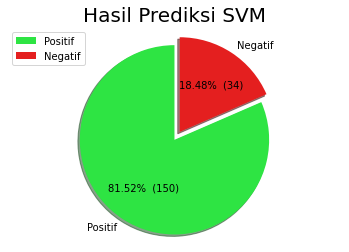

In [ ]:
#Visualisasi Diagram Pie
jml_prediksi_positif = len(hasil_prediksi[hasil_prediksi['Prediksi_Label'].astype(str).str.contains('1')]) #Menghitung banyaknya data hasil prediksi positif
jml_prediksi_negatif = len(hasil_prediksi[hasil_prediksi['Prediksi_Label'].astype(str).str.contains('-1')]) #Menghitung banyaknya data hasil prediksi negatif

labels = 'Positif', 'Negatif'
sizes = [jml_prediksi_positif, jml_prediksi_negatif]
colors = ['#2ee443','#e41f1f']

def make_autopct(sizes):
    def my_autopct(pct):
        total = sum(sizes)
        val = int(round(pct*total/100))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

fig, ax1 = plt.subplots()
explode = (0, 0.1)  
ax1.pie(sizes, colors=colors, labels=labels, explode=explode, autopct=make_autopct(sizes),shadow=True, startangle=90)
ax1.axis('equal') 
ax1.legend(labels, loc = 'upper left') 
plt.title("Hasil Prediksi SVM", fontsize = 20)
plt.savefig('/content/drive/MyDrive/fd/hasil_prediksi_svm.jpg')
plt.show()

In [ ]:
import wordcloud 
from wordcloud import WordCloud
from matplotlib import colors
color_list=['#ffffe0','#ffffe0','#000000',]
colormap=colors.ListedColormap(color_list)

In [ ]:
wordcloud1 = WordCloud().generate(' '.join(hasil_prediksi['review']))

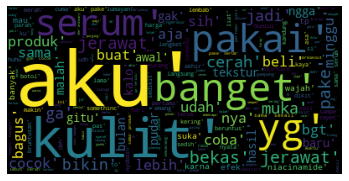

In [ ]:
plt.imshow(wordcloud1)
plt.axis("off")
plt.savefig('/content/drive/MyDrive/fd/hasil_wordcloud.jpg')
plt.show()

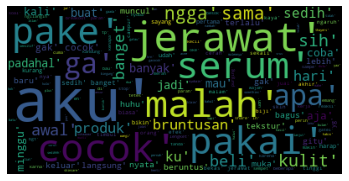

In [ ]:
#Visualisasi Wordcloud dari tabel prediksi negatif
df2=pd.read_csv(r"/content/drive/MyDrive/fd/TabelPrediksiNeg.csv")
wordcloud2 = WordCloud().generate(' '.join(df2['review']))
plt.imshow(wordcloud2)
plt.axis("off")
plt.savefig('/content/drive/MyDrive/fd/hasil_wordcloud_negatif.jpg')
plt.show()

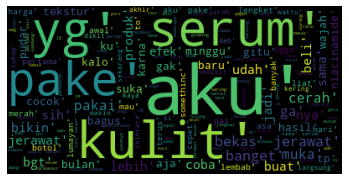

In [ ]:
#Visualisasi Wordcloud dari tabel prediksi positif
df3=pd.read_csv(r"/content/drive/MyDrive/fd/TabelPrediksiPos.csv")
df.head()
wordcloud = WordCloud().generate(' '.join(df3['review']))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('/content/drive/MyDrive/fd/hasil_wordcloud_positif.jpg')
plt.show()

In [ ]:
# Menampilkan kata yang paling banyak muncul pada data review
from collections import Counter
word_common = Counter(' '.join(df['review']).split()).most_common(100)

display(word_common)

[("'aku',", 135),
 ("'jerawat',", 99),
 ("'pake',", 71),
 ("'banget',", 68),
 ("'kulit',", 67),
 ("'bekas',", 64),
 ("'serum',", 62),
 ("'yg',", 59),
 ("'cerah',", 58),
 ("'ga',", 51),
 ("'bikin',", 51),
 ("'sama',", 49),
 ("'muka',", 49),
 ("'pakai',", 43),
 ("'lebih',", 42),
 ("'jadi',", 38),
 ("'buat',", 36),
 ("'produk',", 36),
 ("'nya',", 34),
 ("'bgt',", 34),
 ("'bagus',", 33),
 ("'efek',", 30),
 ("'coba',", 29),
 ("'beli',", 29),
 ("'udah',", 27),
 ("'pudar',", 27),
 ("'sih',", 27),
 ("'niacinamide',", 26),
 ("'suka',", 26),
 ("'lembab',", 24),
 ("'bulan',", 23),
 ("'gak',", 23),
 ("'aja',", 23),
 ("'minggu',", 22),
 ("'hasil',", 22),
 ("'botol',", 22),
 ("'gitu',", 22),
 ("'cocok',", 21),
 ("'wajah',", 21),
 ("'to',", 21),
 ("'tp',", 21),
 ("'tekstur',", 20),
 ("'ku',", 20),
 ("'karna',", 19),
 ("'kalo',", 19),
 ("'pertama',", 18),
 ("'liat',", 17),
 ("'bener',", 17),
 ("'lengket',", 16),
 ("'asa',", 16),
 ("'mau',", 16),
 ("'baru',", 16),
 ("'pas',", 16),
 ("'kali',", 16),
 ("

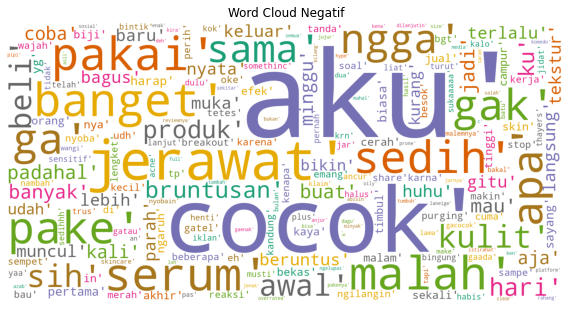

In [ ]:
# 1. WORDCLOUD CONTENT NEGATIF
df4=pd.read_csv(r"/content/drive/MyDrive/fd/TabelPrediksiNeg.csv")
df4.head()
wordcloud2 = WordCloud().generate(' '.join(df4['review']))

wordcloud2 = WordCloud(background_color = "white", mode = "RGB", width = 1600, height = 800, colormap = "Dark2", collocations = False).generate(' '.join(df4['review']))
plt.figure(figsize = (10, 8))
plt.title("Word Cloud Negatif")
plt.imshow(wordcloud2)
plt.axis("off")

plt.savefig('/content/drive/MyDrive/fd/wordcloud_neg.jpg')

plt.show()

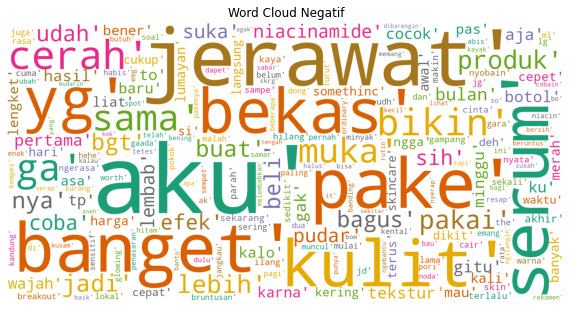

In [ ]:
# 1. WORDCLOUD CONTENT POSITIF
df5=pd.read_csv(r"/content/drive/MyDrive/fd/TabelPrediksiPos.csv")
df5.head()
wordcloud2 = WordCloud().generate(' '.join(df5['review']))
wordcloud2 = WordCloud(background_color = "white", mode = "RGB", width = 1600, height = 800, colormap = "Dark2", collocations = False).generate(' '.join(df5['review']))
plt.figure(figsize = (10, 8))
plt.title("Word Cloud Negatif")
plt.imshow(wordcloud2)
plt.axis("off")

plt.savefig('/content/drive/MyDrive/fd/wordcloud_pos.jpg')

plt.show()

In [ ]:
import numpy as np

In [ ]:
#membuat isi tabel
y = [jml_prediksi_positif, jml_prediksi_negatif]
x_label = ('Positif=' +str(jml_prediksi_positif), 'Negatif=' +str(jml_prediksi_negatif))
x_pos = np.arange(len(x_label))

#membuat barchart dan warnanya
plt.bar(x_pos, y, color = ['green', 'red'])

#membuat judul barchart
plt.title('Hasil Prediksi SVM')

#membuat nama label x dari hasil prediksi
plt.xticks(x_pos, x_label)

#menambahkan nama barchart dan nama label y
plt.ylabel('Jumlah')

#menyimpan barchart
plt.savefig('/content/drive/MyDrive/fd/hasil_barchart.jpg')

#menampilkan barchart
plt.show()